# <span style="color:blue"> Laboratorio di simulazione numerica (LSN) </span>

## <span style="color:green">  Esercitazione numerica 6</span>


In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Esrcizio 6.1

L'esercitazione è rivolta allo studio del modello di Ising monodimensionale. In particolare è richiesto di simulare un sistema ad $N$ spin interagenti solo coi vicini prossimi (nearest neighbors interaction) e con condizioni periodiche ai bordi. L'Hamiltoniana che lo descrive è: $$H=-J \sum^N_{i=1} s_is_{i+1}-\frac{h}{2}\sum^N_{i=1}(s_i+s_{i+1})$$

ed assumiamo $\mu_B=1$ e $k_B=1$.

Ho modificato il codice fornito implementando gli algoritmi di campinamento di Metropolis e di Gibbs ed aggiungendo la possibibilità di ripartire da una configurazione di spin precedentemente generata.

Ho dunque prodotto i grafici in funzione della temperatura $T$ nell'intervallo $[0.5,2.5]$ di **energia interna** $U(N,T; h=0)/N$, **capacità termica** $C(N,T; h=0)/N$ ,**magnetizzazione** $M(N,T; h=0.02)/N$ e **suscettività magnetica** $\chi(N,T; h=0)/N$, con relativa incertezza statistica.

I parametri utilizzati per la simulazione sono:
- $N=50$ spins; 
- $10^3$ step di calibrazione;
- $20$ blocchi;
- $10^5$ step per blocco;

Di seguito sono riportati i grafici ottenuti con entrambi i metodi di sampling a confronto coi valori analitici attesi.

In [2]:
#Compute analytical values
points=1000
T = np.linspace(0.45,2.55,num=points)
beta = 1/T
J = 1.0
Ns = 50
h=0.02 #external field
b = 1/T
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

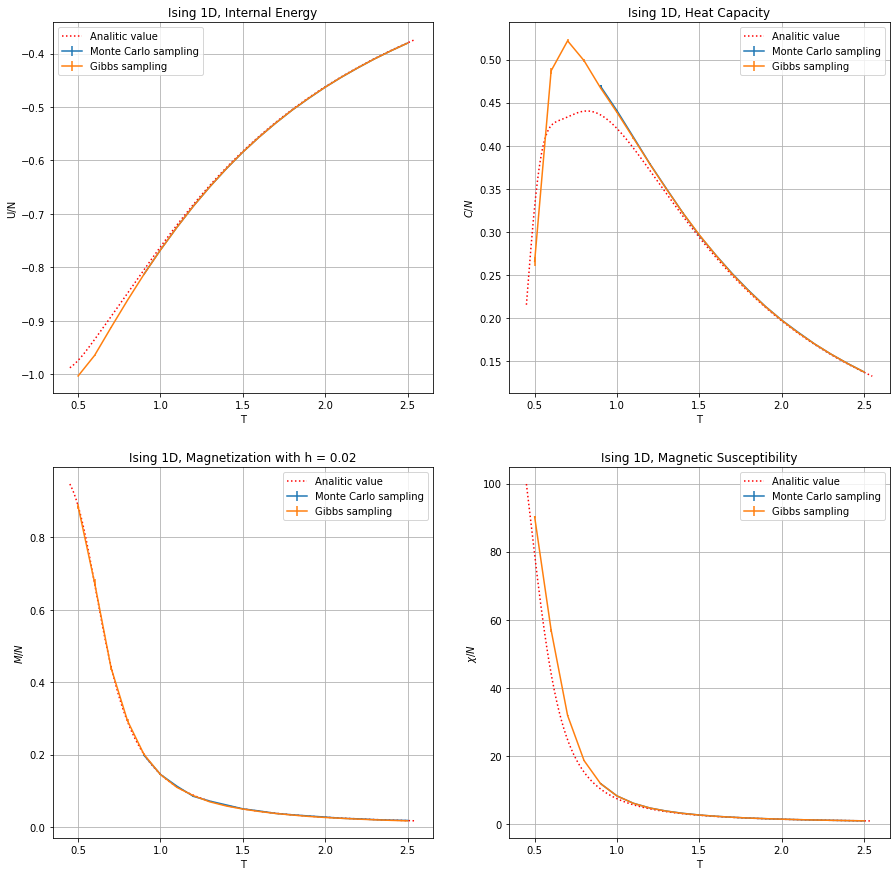

In [3]:
plt.figure(figsize=(15,15))
# Internal Energy
plt.subplot(221)
x_ene_m, y_ene_m, yerr_ene_m = np.loadtxt("../results/energy_vs_temperature_metropolis.dat", delimiter = " ", unpack = True)
x_ene_g, y_ene_g, yerr_ene_g = np.loadtxt("../results/energy_vs_temperature_gibbs.dat", delimiter = " ", unpack = True)

plt.errorbar(x_ene_m, y_ene_m, yerr_ene_m, label = "Monte Carlo sampling")
plt.errorbar(x_ene_g, y_ene_g, yerr_ene_g, label = "Gibbs sampling")
plt.plot(T, e, label="Analitic value", color='r', linestyle="dotted")
plt.title('Ising 1D, Internal Energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
plt.legend()

# Heat Capacity
plt.subplot(222)
x_heat_g, y_heat_g, yerr_heat_g = np.loadtxt("../results/heat_capacity_vs_temperature_gibbs.dat", delimiter = " ", unpack = True)
x_heat_m, y_heat_m, yerr_heat_m = np.loadtxt("../results/heat_capacity_vs_temperature_metropolis.dat", delimiter = " ", unpack = True)

plt.errorbar(x_heat_m, y_heat_m, yerr_heat_m, label = "Monte Carlo sampling")
plt.errorbar(x_heat_g, y_heat_g, yerr_heat_g, label = "Gibbs sampling")
plt.plot(T, heat, label="Analitic value", color='r', linestyle="dotted")
plt.title('Ising 1D, Heat Capacity')
plt.xlabel('T')
plt.ylabel('$C/N$')
plt.grid(True)
plt.legend()

# Magnetization
plt.subplot(223)
x_mag_g, y_mag_g, yerr_mag_g = np.loadtxt("../results/magnetization_vs_temperature_gibbs.dat", delimiter = " ", unpack = True)
x_mag_m, y_mag_m, yerr_mag_m = np.loadtxt("../results/magnetization_vs_temperature_metropolis.dat", delimiter = " ", unpack = True)

plt.errorbar(x_mag_m, y_mag_m, yerr_mag_m, label = "Monte Carlo sampling")
plt.errorbar(x_mag_g, y_mag_g, yerr_mag_g, label = "Gibbs sampling")
plt.plot(T, M, label="Analitic value", color='r', linestyle="dotted")
plt.title('Ising 1D, Magnetization with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M/N$')
plt.grid(True)
plt.legend()

# Magnetic Susceptibility
plt.subplot(224)
x_chi_g, y_chi_g, yerr_chi_g = np.loadtxt("../results/magnetic_susceptibility_vs_temperature_gibbs.dat", delimiter = " ", unpack = True)
x_chi_m, y_chi_m, yerr_chi_m = np.loadtxt("../results/magnetic_susceptibility_vs_temperature_metropolis.dat", delimiter = " ", unpack = True)

plt.errorbar(x_chi_m, y_chi_m, yerr_chi_m, label = "Monte Carlo sampling")
plt.errorbar(x_chi_g, y_chi_g, yerr_chi_g, label = "Gibbs sampling")
plt.plot(T, X, label="Analitic value", color='r', linestyle="dotted")
plt.title('Ising 1D, Magnetic Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi/N$')
plt.grid(True)
plt.legend()

plt.show()

I risultati ottenuti con simulazione Monte Carlo e campionamento di Gibbs producono risultati simili tra loro ed in buon accordo con i valori teorici previsti.